In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [16]:
data=  pd.read_csv("./Salary_Data.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [17]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [18]:
data.dropna(inplace=True)
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [19]:
# Models to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
bins = [0,50000, 70000,115000, 160000,250000]
label =["<=50k","50k-80k","80k-115k","115k-160k","169k-250k"]

data["Salary"] =pd.cut(data["Salary"],labels=label,bins= bins)

data["Gender"].value_counts()


Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [21]:
##encoding stuff
from sklearn.preprocessing import LabelEncoder

label_Encoder = {} 
label_mapping = {}
encoding_columns = data.select_dtypes(exclude="number").columns.to_list()
for i in encoding_columns:
   lr = LabelEncoder()
   data[i] = lr.fit_transform(data[i])
   label_Encoder[i] = lr
   label_mapping = {int(i): label for i, label in enumerate(lr.classes_)}



   
label_Encoder
label_mapping
print(label_Encoder["Gender"].classes_)



['Female' 'Male' 'Other']


In [22]:
#removing outliers
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_iqr = Q1_age - 1.5 * IQR_age
upper_bound_iqr = Q3_age + 1.5 * IQR_age
new_data = data[(data["Age"]>=lower_bound_iqr) & (data["Age"]<=upper_bound_iqr)]


<Axes: xlabel='berfore outliers'>

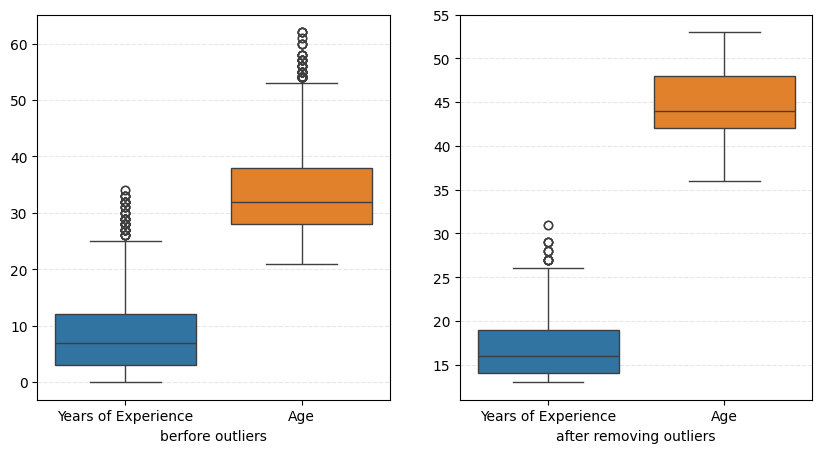

In [23]:
Q1_yoe = data['Age'].quantile(0.25)
Q3_yoe = data['Age'].quantile(0.75)
IQR_yoe = Q3_yoe - Q1_yoe

lower_bound_iqr_yoe = Q1_yoe - 1.5 * IQR_yoe
upper_bound_iqr_yoe = Q3_yoe + 1.5 * IQR_yoe
new_data = new_data[(new_data["Years of Experience"]>=lower_bound_iqr_yoe) & (new_data["Age"]<=upper_bound_iqr_yoe)]

len(new_data)-len(data)
fig,ax = plt.subplots(1,2,figsize=(10,5))
# plt.figure(figsize=(10,15))
ax[0].set_xlabel("berfore outliers")
ax[1].set_xlabel("after removing outliers")
ax[0].grid(linestyle="--",alpha=0.3)
ax[1].grid(linestyle="--",alpha=0.3)

sns.boxplot(new_data[["Years of Experience","Age"]],ax=ax[1])
sns.boxplot(data[["Years of Experience","Age"]],ax=ax[0])


<Axes: ylabel='Count'>

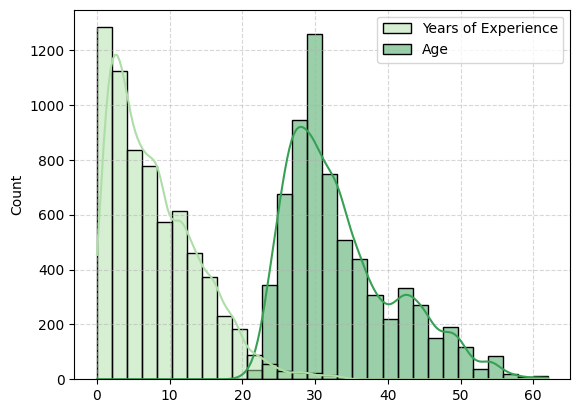

In [40]:
plt.grid(linestyle="--",alpha=0.5)

# sns.histplot(new_data[["Years of Experience","Age"]],ax=ax[1],kde=True)
sns.histplot(data[["Years of Experience","Age"]],kde=True,palette="Greens")


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import pandas as pd


X = new_data.drop("Salary", axis=1)  
y = new_data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression())
    ]),
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GradientBoostingClassifier())
    ]),
    "Support Vector Machine": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC())
    ]),
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    "Naive Bayes": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GaussianNB())
    ]),
    "XGBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}


results = []
trained_models = {}
for name, pipeline in models.items():
    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        trained_models[name] = pipeline
        results.append((name, acc))
        print(f"{name} Accuracy: {acc:.4f}")
    except Exception as e:
        print(f"{name} failed: {e}")


results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df= results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("\nSorted Results:")
print(results_df)


Logistic Regression Accuracy: 0.7737
Decision Tree Accuracy: 0.9526
Random Forest Accuracy: 0.9453
Gradient Boosting Accuracy: 0.9343
Support Vector Machine Accuracy: 0.9015
K-Nearest Neighbors Accuracy: 0.9088
Naive Bayes Accuracy: 0.7226


c:\Users\rates\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:45:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9562

Sorted Results:
                    Model  Accuracy
0                 XGBoost  0.956204
1           Decision Tree  0.952555
2           Random Forest  0.945255
3       Gradient Boosting  0.934307
4     K-Nearest Neighbors  0.908759
5  Support Vector Machine  0.901460
6     Logistic Regression  0.773723
7             Naive Bayes  0.722628


In [25]:
import pickle as pkl

xgboost =  trained_models["XGBoost"]
#salarymapping

try:
    with open("./pickle/XGBoost_Model.pkl","wb")as file:
        pkl.dump(xgboost,file)

    with open("pickle/Encoder.pkl","wb") as file:
        pkl.dump(label_Encoder,file)

    with open("pickle/ModleComparisonResults.pkl","wb") as file:
        pkl.dump(results_df,file)
except Exception as e:
    print(e)
